In [520]:
%reload_ext autoreload
%autoreload 2
import pandas as pd
import datetime as dt
import warnings
warnings.filterwarnings("ignore")
from collections import defaultdict
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso
import seaborn as sns
import numpy as np
import utils
from Model import Model
from tqdm import tqdm
from PrecisionMatrixBuilder import PrecisionMatrixBuilder
from Forecaster import Forecaster
from DataLoader import DataLoader
from PortfolioConstructor import PortfolioConstructor

pd.options.display.max_columns = 500
pd.options.display.max_rows = 500

Stellantis and WLN have a lot of missing prices compared to the other stocks in the CAC40: we exclude them from this analysis.

In [525]:
dataloader = DataLoader()
full_dataset, stock_names, time_index = dataloader.load_full_dataset_array()

[*********************100%***********************]  40 of 40 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [526]:
tscv = list(utils.time_series_cross_validation(full_dataset, time_index, n_splits=10, valid_size=44, test_size=66))

In [395]:
model_1 = Model("Lasso", "regression", Lasso(alpha=0.05))
model_2 = Model("LogisticRegression", "classification", LogisticRegression(penalty = "l1", C = 0.05, solver = "saga"))

In [396]:
models = [model_1, model_2]
forecaster = Forecaster(full_dataset, stock_names, time_index, valid_size=44, test_size=66, n_splits=10)

In [397]:
results, forecasts_val, forecasts_test, train_index, valid_index, test_index = forecaster.get_forecasts(tscv, models, stock_names)

In [398]:
returns = dataloader.load_returns()

In [399]:
forecasts_val['Lasso']

,ACA.PA,AI.PA,AIR.PA,ALO.PA,BN.PA,BNP.PA,CA.PA,CAP.PA,CS.PA,DG.PA,...,SAF.PA,SAN.PA,SGO.PA,STMPA.PA,SU.PA,TEP.PA,TTE.PA,URW.AS,VIE.PA,VIV.PA
2020-03-11,-0.040521,0.114970,-3.190583e-18,7.976456e-18,0.026428,6.021067e-02,-5.198593e-03,-0.003478,-0.046824,0.068871,...,0.003020,2.555791e-03,-9.165862e-04,0.000000e+00,0.099313,0.063894,1.435762e-17,3.190583e-18,-0.049250,8.508252e-02
2020-03-12,-0.015305,0.119329,-3.190583e-18,7.976456e-18,0.024492,6.126823e-02,-1.963458e-03,-0.001314,0.008685,0.070833,...,0.038918,2.677806e-03,1.845904e-03,0.000000e+00,0.098329,0.115725,1.435762e-17,3.190583e-18,-0.018601,1.126510e-01
2020-03-13,-0.345793,0.200978,-3.190583e-18,7.976456e-18,0.048980,1.106365e-02,-4.436262e-02,-0.029678,-0.660291,0.124687,...,-0.311539,4.364517e-03,-2.970350e-02,0.000000e+00,0.195684,0.011369,1.435762e-17,3.190583e-18,-0.420280,2.159997e-01
2020-03-16,0.047631,0.135740,-3.190583e-18,7.976456e-18,0.036112,9.132190e-02,6.110718e-03,0.004088,0.161036,0.086218,...,0.133388,3.818369e-03,1.057089e-02,0.000000e+00,0.148190,0.231125,1.435762e-17,3.190583e-18,0.057891,1.476713e-01
2020-03-17,-0.156547,0.124126,-3.190583e-18,7.976456e-18,0.021481,6.430252e-02,-2.008373e-02,-0.013436,-0.263367,0.102976,...,-0.094059,2.469385e-03,-7.595138e-03,0.000000e+00,0.108072,0.103787,1.435762e-17,3.190583e-18,-0.190268,1.477753e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,-0.007061,0.008216,-7.556286e-18,7.556286e-18,-0.000499,1.070474e-17,6.296905e-18,-0.002255,-0.028543,0.006381,...,-0.005465,5.037524e-18,-6.296905e-19,5.037524e-18,0.008222,-0.000028,-1.239948e-03,-1.259381e-17,-0.017211,3.778143e-18
2022-12-27,-0.001574,0.004490,-7.556286e-18,7.556286e-18,-0.000243,1.070474e-17,6.296905e-18,-0.000503,-0.006364,0.006931,...,-0.001218,5.037524e-18,-6.296905e-19,5.037524e-18,0.009585,-0.000385,-1.470957e-03,-1.259381e-17,-0.003837,3.778143e-18
2022-12-28,0.005022,0.007227,-7.556286e-18,7.556286e-18,-0.002871,1.070474e-17,6.296905e-18,0.001604,0.020300,0.006712,...,0.003887,5.037524e-18,-6.296905e-19,5.037524e-18,0.007495,-0.000382,-1.715605e-03,-1.259381e-17,0.012240,3.778143e-18
2022-12-29,-0.004605,0.008228,-7.556286e-18,7.556286e-18,-0.002173,1.070474e-17,6.296905e-18,-0.001471,-0.018616,0.007674,...,-0.003564,5.037524e-18,-6.296905e-19,5.037524e-18,0.007760,-0.000486,-1.834827e-03,-1.259381e-17,-0.011225,3.778143e-18


In [400]:
returns.loc[forecasts_val['Lasso'].index, :]

,ACA.PA,AI.PA,AIR.PA,ALO.PA,BN.PA,BNP.PA,CA.PA,CAP.PA,CS.PA,DG.PA,...,SAF.PA,SAN.PA,SGO.PA,STMPA.PA,SU.PA,TEP.PA,TTE.PA,URW.AS,VIE.PA,VIV.PA
Date,,,,,,,,,,,,,,,,,,,,,
2020-03-11,-0.002866,-0.016384,-0.004135,0.002323,-0.014225,0.024688,-0.042709,-0.025020,-0.015353,-0.063431,...,-0.017375,-0.019725,-0.014583,0.004255,-0.015227,-0.000015,0.017106,0.008625,-0.049901,-0.006641
2020-03-12,0.024083,0.007097,-0.044740,-0.028679,0.009019,0.029295,0.009946,-0.015078,-0.002952,0.014140,...,-0.026389,0.015935,-0.001607,-0.020585,0.015684,-0.031237,-0.017621,-0.007988,-0.035593,-0.013399
2020-03-13,-0.180207,-0.118348,-0.183126,-0.088137,-0.088942,-0.140053,-0.136327,-0.123348,-0.165102,-0.187238,...,-0.184551,-0.080933,-0.172991,-0.159209,-0.151043,-0.143645,-0.160262,-0.243541,-0.175290,-0.135331
2020-03-16,0.039829,0.049113,0.040767,0.009395,0.016117,0.023266,0.055615,-0.034093,0.022686,0.055840,...,-0.015083,-0.000418,-0.016781,0.025174,0.018221,-0.002301,-0.013558,0.023541,-0.038915,0.042596
2020-03-17,-0.121331,-0.059956,-0.074415,-0.066107,0.003706,-0.145268,-0.012363,-0.107918,-0.131286,-0.132140,...,-0.122816,0.042529,-0.187609,-0.092300,-0.021640,-0.078713,-0.067150,-0.217349,-0.040772,-0.075090
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,0.002195,-0.013989,-0.013137,-0.013262,0.000336,-0.004062,-0.000796,-0.004940,-0.004672,-0.004636,...,-0.014151,0.002026,-0.008897,-0.035523,-0.023434,-0.001533,0.000002,-0.019463,-0.014275,-0.004854
2022-12-27,0.001474,0.000282,-0.001061,0.010323,0.004548,-0.000352,0.008597,-0.007530,-0.005638,0.004409,...,-0.002885,-0.003568,0.011168,-0.008907,0.002429,0.005286,0.003387,0.003212,-0.000166,-0.000166
2022-12-28,0.006570,0.001478,0.009452,0.006334,-0.000066,0.003544,-0.008930,0.004322,0.002667,-0.002718,...,0.015029,-0.006451,0.002539,-0.010937,0.009695,0.005707,0.006902,0.003099,0.002754,-0.005775


<AxesSubplot:>

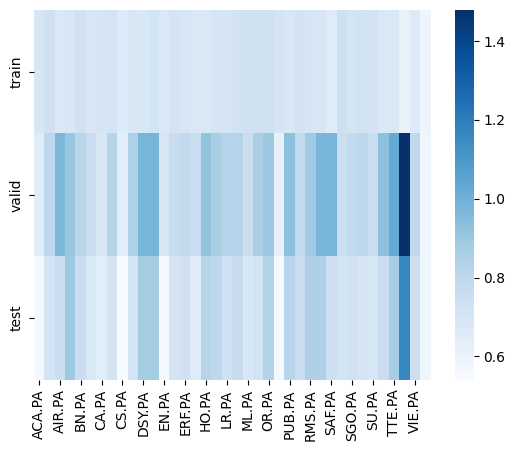

In [401]:
sns.heatmap(results['Lasso']['MAE'], cmap = "Blues")

<AxesSubplot:>

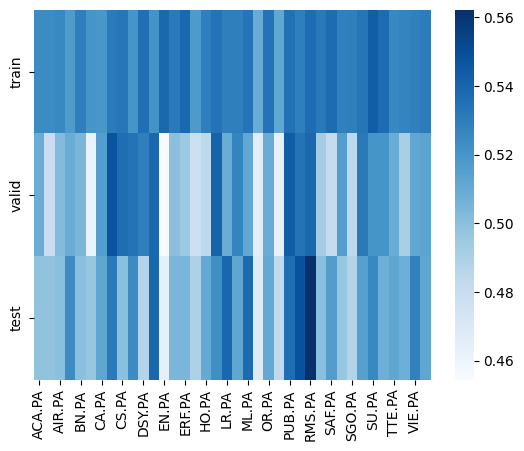

In [402]:
sns.heatmap(results['LogisticRegression']['Accuracy'], cmap = "Blues")

In [366]:
returns = dataloader.load_returns(full_dataset, stock_names, time_index)
precision_matrix_builder = PrecisionMatrixBuilder(returns, 512)

In [417]:
prec_mat = precision_matrix_builder.get_precision_matrix()

100%|██████████| 2930/2930 [13:28<00:00,  3.63it/s]


In [534]:
portfolio_constructor = PortfolioConstructor(models, stock_names, forecasts_val, prec_mat, precision_matrix_builder.alphas, precision_matrix_builder.thetas)
portfolios = portfolio_constructor.get_portfolios()

100%|██████████| 2/2 [00:25<00:00, 12.63s/it]


In [535]:
backtests_stats, backtest_performances = utils.run_backtests(portfolios, dataloader, time_index, models, portfolio_constructor.lambdas, portfolio_constructor.alphas, portfolio_constructor.thetas)

In [536]:
backtests_stats.T.style.background_gradient(axis = 0)

<AxesSubplot:>

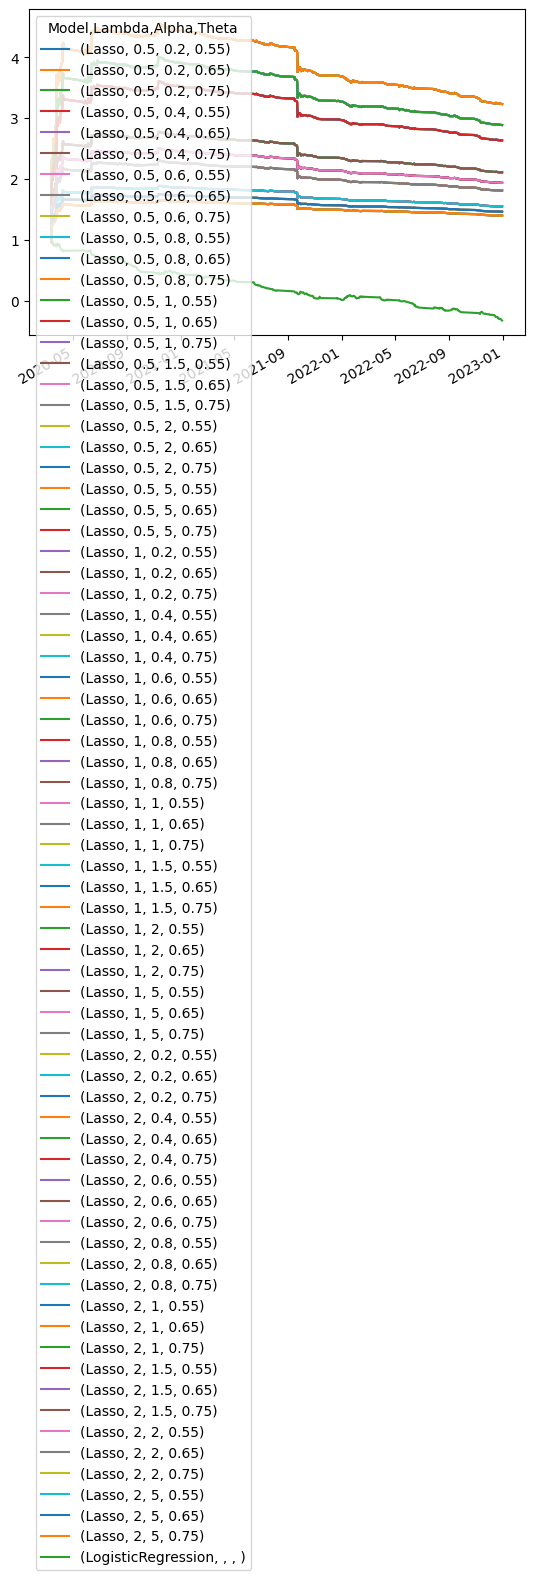

In [537]:
backtest_performances.plot()